# Exercise: Machine Learning Algorithms & Clustering

Version: SoSe 2022

Estimated time needed: 90 minutes

Author: Jenny Kozielski

______

# Objectives

After completing this exercise you will be able to:

 - Understand typical data for machine learning problems
 - Analyze decision trees and its parameters
 - Use machine learning
 - Compare different machine learning algorithms
 - Understand the basics of clustering

**Reminder: Please upload this exercise on [Google Colab](https://colab.research.google.com/) so you would be able to work on the tasks**

**Reading material:<br>
Mandatory: https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/**

# Task 1
### https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/

Data can be separated using a SVM with a ...

<details><summary>Click here for the solution</summary>

## Solution:    
    
Hyerplane
</details>

# Task 2
### https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/

What should be maximized so that the data can be separated?

<details><summary>Click here for the solution</summary>

## Solution:
    
Margin between hyperplane and data
    
</details>

# Task 3
### https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/

Data can be projected to a higher dimension without a lot of computational intensity due to the ...

<details><summary>Click here for the solution</summary>

## Solution:
    
Kernel-Trick

</details>

# Machine Learning Algorithms

# Task 4

Take a look at the Iris record (iris.csv). This is only for contemplation and understanding the data.


1. How many different class labels are there and how can they be found in the dataset?

<details><summary>Click here for the solution</summary>

## Solution:

3 (setosa, versicolor, verginica = 0,1,2)

</details>

2. What features are there and what type of data do they have?

<details><summary>Click here for the solution</summary>

## Solution:

4 Features, petal length, petal width, sepal length, sepal width, Zentimeter
    
</details>

3. Look at the plots. Which class is easiest to differentiate?

<details><summary>Click here for the solution</summary>

## Solution:

setosa
    
</details>

4. View linear regression models for paired features. How do you rate the quality of this method? For which two features does it best fit and how would you interpret it semantically?

<details><summary>Click here for the solution</summary>

## Solution:

sns.pairplot(iris_sns, kind="reg"). Rather bad; however, petal_length and petal_width are correlated, for example: Width 2 Length 6
</details>

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
['setosa', 'versicolor', 'virginica']


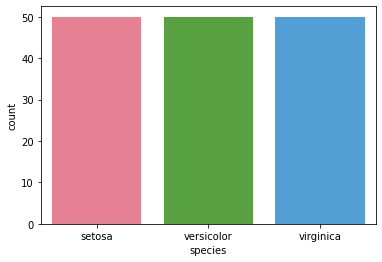

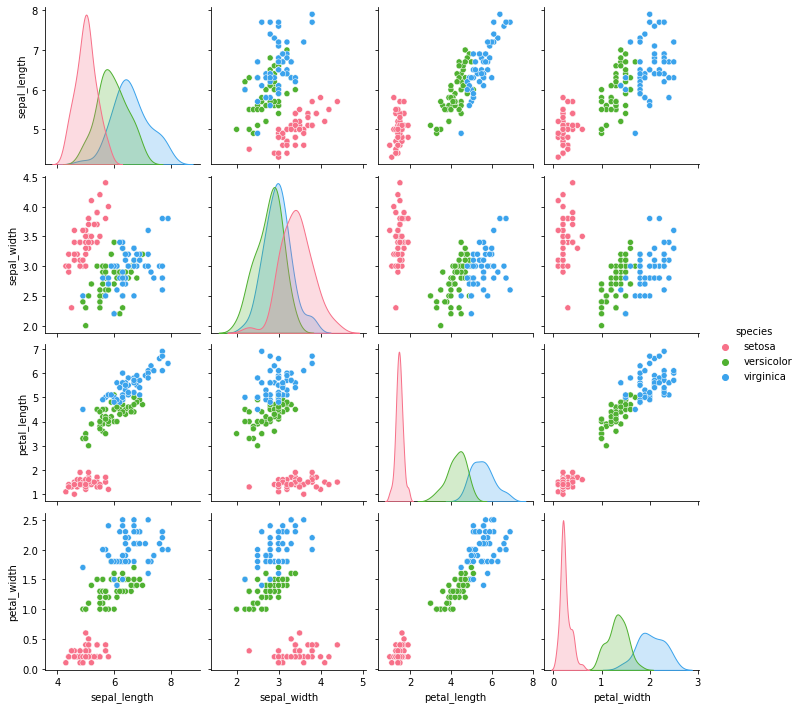

In [8]:
from sklearn.datasets import load_iris
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

iris_skl = load_iris() # load the iris dataset
iris_sns = sns.load_dataset("iris")

# show the class distribution
%matplotlib inline 
print(iris_sns.head())
print(list(iris_skl.target_names))

sns.countplot(x="species", data = iris_sns, palette="husl")

sns.pairplot(iris_sns, hue="species", palette="husl")

# Task 5

1. Output the tree (without depth limit). What do you notice? At which points are further nodes not useful and how could this be corrected?

<details><summary>Click here for the solution</summary>

## Solution:

There are only a few instances left for each of the classes at some nodes. The depth of the tree should be minimized.
</details>

2. Look at the following code lines. Gini Index and Entropy both evaluate the nodes and can be applied to the decision tree. What would be more unfavorable? Compare them with the digit data set.

In [9]:
# gini_score = 1 - sum([i**2 for i in values])
# entropy_score = sum([-i*log(i,2) for i in values])

<details><summary>Click here for the solution</summary>

## Solution:

Entropy: because of logarithmus it takes longer with more data
</details>

In [10]:
import time
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# digits to see difference in gini vs entropy
# dig = load_digits()
# X_train, X_test, y_train, y_test = train_test_split(dig.data, dig.target, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(iris_skl.data, iris_skl.target, test_size=0.33)

t0 = time.process_time()
classifier = tree.DecisionTreeClassifier(criterion="gini", max_depth=None)
classifier = classifier.fit(X_train, y_train)
t1 = time.process_time()
time1 = t1-t0
print("Time needed with", classifier.criterion, ":", time1)
classifier2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
classifier2 = classifier2.fit(X_train, y_train)
t2 = time.process_time()
time2 = t2-t1
print("Time needed with", classifier2.criterion, ":", time2)
if time1 < time2:
    print("Fastest method:", classifier.criterion)
elif time2 < time1:
    print("Fastest method:", classifier2.criterion)
else:
    print("Same time.")

y_pred = classifier.predict(X_test)
print("Pred: ", y_pred[0:20], ".....")
print("Orig: ", y_test[0:20], ".....")
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Time needed with gini : 0.0
Time needed with entropy : 0.0
Same time.
Pred:  [0 0 2 1 0 1 2 0 0 1 1 1 2 1 2 1 0 1 2 1] .....
Orig:  [0 0 2 1 0 1 2 0 0 1 2 1 2 1 2 1 0 2 2 1] .....
0.94
[[17  0  0]
 [ 0 14  0]
 [ 0  3 16]]


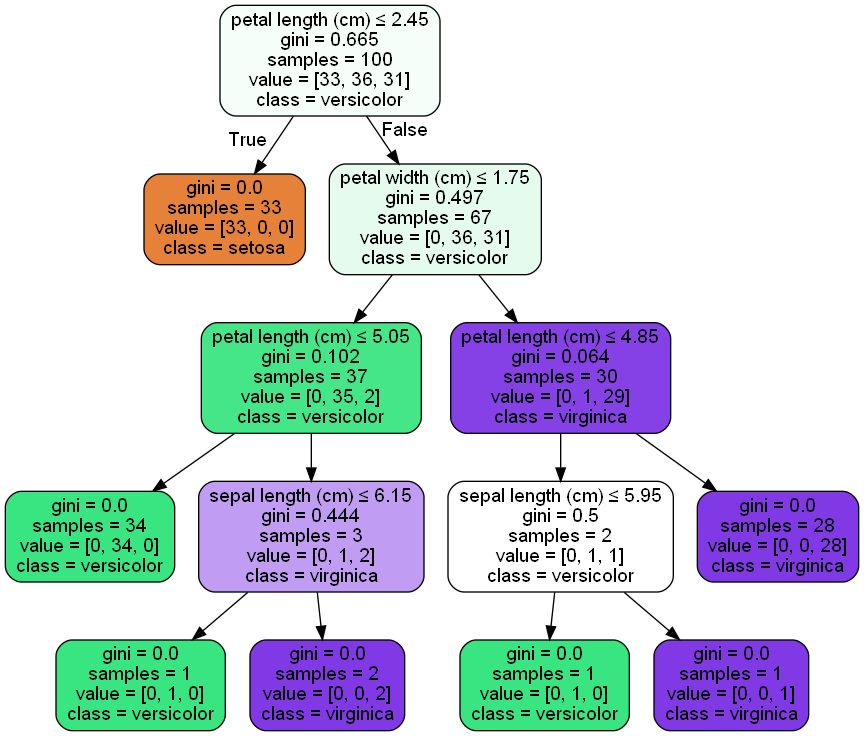

In [11]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image, display

# Export as dot file
export_graphviz(classifier, out_file='tree.dot',
                feature_names=iris_skl.feature_names,
                class_names=iris_skl.target_names, 
                filled=True, rounded=True,
                special_characters=True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'], shell=True)

# Display in jupyter notebook
display(Image(filename = 'tree.png'))

# Task 6

Take a look at the code below.

KNeighborsClassifier
Accuracy on Training Set: 99.2205%
Accuracy on Test Set: 96.3293%
SVC
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 94.4383%
DecisionTreeClassifier
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 73.6374%
RandomForestClassifier
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 92.1023%
MLPClassifier
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 93.5484%
GaussianNB
Accuracy on Training Set: 85.8575%
Accuracy on Test Set: 80.7564%


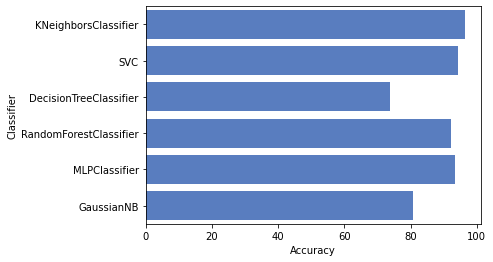

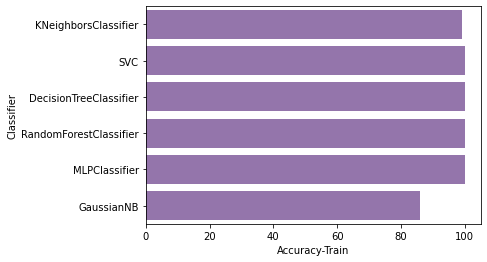

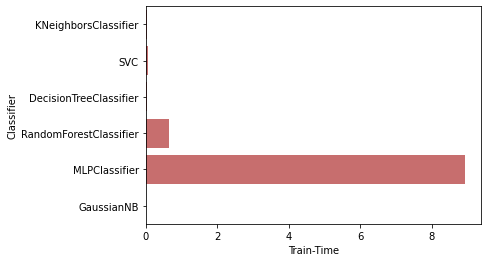

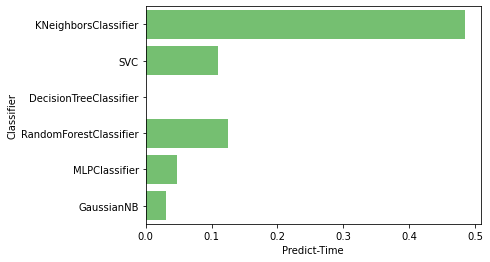

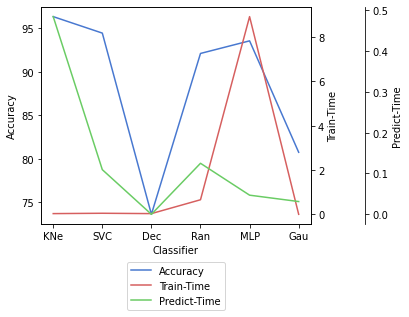

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import datasets, svm, tree, metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

x_train, y_train = data[:n_samples // 2], digits.target[:n_samples // 2]
x_test, y_test = data[n_samples // 2:], digits.target[n_samples // 2:]

log_cols=["Classifier", "Accuracy", "Train-Time", "Predict-Time", "Accuracy-Train"]
log = pd.DataFrame(columns=log_cols)
log_short = pd.DataFrame(columns=log_cols)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
    GaussianNB()]

for clf in classifiers:
    t0 = time.process_time()
    clf.fit(x_train, y_train)
    t1 = time.process_time()
    training_time = t1-t0
    
    name = clf.__class__.__name__
    name_short = clf.__class__.__name__[:3]
    
    print("="*30)
    print(name)
    
    t0 = time.process_time()
    predictions = clf.predict(x_test)
    predictions_train = clf.predict(x_train)
    t1 = time.process_time()
    predict_time = t1-t0

    acc_train = accuracy_score(y_train, predictions_train)
    print("Accuracy on Training Set: {:.4%}".format(acc_train))
    acc = accuracy_score(y_test, predictions)
    print("Accuracy on Test Set: {:.4%}".format(acc))
        
    log_entry = pd.DataFrame([[name, acc*100, training_time, predict_time, acc_train*100]], columns=log_cols)
    log = log.append(log_entry)
    log_entry_short = pd.DataFrame([[name_short, acc*100, training_time, predict_time, acc_train*100]], columns=log_cols)
    log_short = log_short.append(log_entry_short)
    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
plt.show()
sns.barplot(x='Accuracy-Train', y='Classifier', data=log, color="m")
plt.show()
sns.barplot(x='Train-Time', y='Classifier', data=log, color="r")
plt.show()
sns.barplot(x='Predict-Time', y='Classifier', data=log, color="g")
plt.show()


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

p1, = host.plot('Classifier', 'Accuracy', data=log_short, color="b")
p2, = par1.plot('Classifier', 'Train-Time', data=log_short, color="r")
p3, = par2.plot('Classifier', 'Predict-Time', data=log_short, color="g")

host.set_xlabel("Classifier")
host.set_ylabel("Accuracy")
par1.set_ylabel("Train-Time")
par2.set_ylabel("Predict-Time")

lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], loc="upper center", bbox_to_anchor=(0.5, -0.15))

plt.show()

1. Based on the plots, compare the classifiers to each other. How would you determine the quality of the classifier? How would you weight the runtime?

<details><summary>Click here for the solution</summary>

## Solution:

Accuracy and runtime. Runtime is quite fast here, but what if we had more data?
</details>

2. Take a look at the plots. Why is accuracy better for the training data than for the test data?

<details><summary>Click here for the solution</summary>

## Solution:

Test data is unknown, while training data is known.
</details>


3. Look at the parameters of the SVC. Is it a hard margin or soft margin and what do you think is better in principal?


<details><summary>Click here for the solution</summary>

## Solution:

Soft margin would be better.
</details>

4. Which classifier would you consider to be the worst? What could be the reason? Suggest a possible improvement.

<details><summary>Click here for the solution</summary>

## Solution:

Decision Tree, probably because of overfitting. We could set the max_depth to be, for instance, 10-15.
</details>

5. Common sizes for test sets are 10-20% of the data. Change the code accordingly and look at the changes. Where do the improvements come from?

<details><summary>Click here for the solution</summary>

## Solution:

split = int(len(data)\*0.9)

x_train, y_train = data\[:split], digits.target[:split]

x_test, y_test = data[split:], digits.target[split:]


Improvements happen because we used more data for training and less for testing.
</details>

# Clustering

# Task 7

1. What kind of problems would clustering be used for, in comparison to other Machine Learning models? Name an example.

<details><summary>Click here for the solution</summary>

## Solution:

  <ul>
      <li> There are no gold labels in the dataset, similar data are grouped/clustered together </li>
      <li> Amazon, recommender systems </li>
  </ul>
</details>

2. Look at the code below and its output. What is the optimum value for k and how does the cluster look like?

For n_clusters = 2 The average silhouette_score is : 0.25931695553182543
Nr of samples per Cluster:  [91 87]


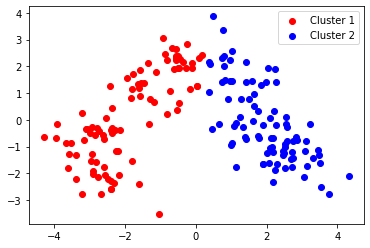

For n_clusters = 3 The average silhouette_score is : 0.2848589191898987
Nr of samples per Cluster:  [51 62 65]


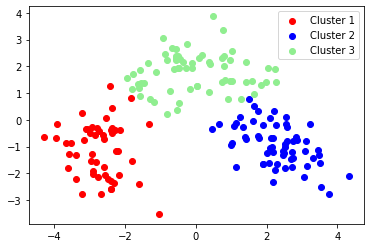

For n_clusters = 4 The average silhouette_score is : 0.25987462789190524
Nr of samples per Cluster:  [55 46 49 28]


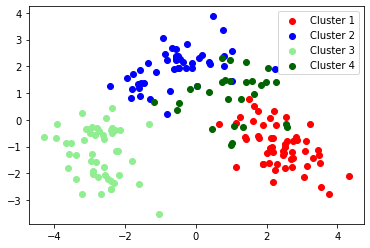

For n_clusters = 5 The average silhouette_score is : 0.19734439798042422
Nr of samples per Cluster:  [56 41 25 27 29]


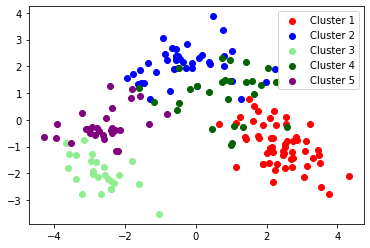

For n_clusters = 6 The average silhouette_score is : 0.1381694051986392
Nr of samples per Cluster:  [20 35 31 41 25 26]


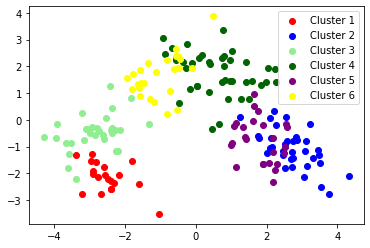

For n_clusters = 7 The average silhouette_score is : 0.1554351478858128
Nr of samples per Cluster:  [42 21 25 23 30 17 20]


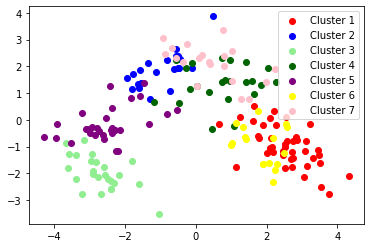

   Clusters   K-Means
0         2  0.259317
1         3  0.284859
2         4  0.259875
3         5  0.197344
4         6  0.138169
5         7  0.155435


In [13]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pandas
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Settings:
min_clusters = 2
max_clusters = 8
colors = ['red', 'blue', 'lightgreen', 'darkgreen', 'purple', 'yellow', 'pink']

# Load dataset and drop column 'target'.
data = pandas.read_csv("https://raw.githubusercontent.com/MMesgar/Foundation_of_AI/master/lecture09/data/wine_data_mod.csv", sep=",")
data = data.drop("target", axis=1)

# Extract the values and preprocess them.
winearray = data.values
winearray_norm = sklearn.preprocessing.scale(winearray)
kmeans_sil_scores = []

for num_clusters in range(min_clusters, max_clusters):
    # Execute KMeans algorithm.
    clusterer = sklearn.cluster.KMeans(n_clusters=num_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(winearray_norm)
    
    # Compute silhouette score.
    silhouette_avg = silhouette_score(winearray_norm, cluster_labels)
    print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg)
    print("Nr of samples per Cluster: ", np.bincount(cluster_labels))    
    kmeans_sil_scores.append([num_clusters, silhouette_avg])
    
    # Project the dataset into lower dimensional space
    pca = PCA()
    transformed = pd.DataFrame(pca.fit_transform(winearray_norm))
    
    # Plot the clustering results.
    for c, color in zip(range(num_clusters), colors):
        x = transformed[cluster_labels==c][0]
        y = transformed[cluster_labels==c][1]
        
        plt.scatter(x, y, label='Cluster {}'.format(c + 1), color=color)
    
    # Show the resulting visualization.
    plt.legend()
    plt.show()

    
table_index = []
table_kmeans = []

for num_clusters, silhouette_avg in kmeans_sil_scores:
    table_index.append(num_clusters)
    table_kmeans.append(silhouette_avg)

# Print the results as a table.
df = pandas.DataFrame({'Clusters':table_index, 'K-Means':table_kmeans})
print(df[['Clusters', 'K-Means']])

<details><summary>Click here for the solution</summary>

## Solution:

k = 3 (3 clusters) is the best. It divides the data into 51, 62 and 65 samples, while the actual distribution is 59, 71 and 48 samples.
</details>